In [22]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import wilcoxon
import matplotlib.pyplot  as plt
from scipy.stats import  ttest_ind

In [23]:
df = pd.read_csv('/Users/arqavan/Downloads/HBN.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df_h = df.copy()

In [24]:
numeric_df = df_h.select_dtypes(include=[np.number])
numeric_columns = df_h.select_dtypes(include=['float64']).columns
imputer_algorithm = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_h[numeric_columns] = imputer_algorithm.fit_transform(df_h[numeric_columns])


In [25]:
df_h.describe()

,Age,Sex,CGAS-Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,...,3960.000000,3960.00000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000
mean,10.433586,0.372727,69.774883,19.128375,55.955510,88.916140,27.154555,69.635964,81.573786,116.919303,...,1.456579,1.66221,1.608375,1.173603,0.944972,27.975206,41.182568,57.744383,1.065923,0.573300
std,3.574648,0.483591,34.139399,5.011108,6.767037,40.383904,4.307596,11.986944,12.116682,15.082147,...,1.290856,1.25691,1.311652,1.157513,1.023809,17.557513,8.865401,11.217744,1.015108,0.666871
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,60.000000,16.249803,51.000000,61.200000,24.000000,63.000000,75.000000,108.000000,...,0.600000,1.00000,1.000000,0.000000,0.000000,17.000000,35.000000,50.000000,0.000000,0.000000
50%,10.000000,0.000000,65.454771,18.710750,55.946713,84.000000,27.000000,69.400000,81.597236,116.000000,...,1.200000,1.62789,1.613636,1.000000,0.943652,27.896199,40.800000,57.400000,1.000000,0.400000
75%,13.000000,1.000000,70.000000,20.850943,60.500000,106.800000,29.000000,74.000000,88.000000,123.000000,...,2.000000,2.00000,2.000000,1.800000,1.000000,37.000000,45.000000,62.200000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


# آزمون فرض

# 1

اختلالات خواب می‌تواند منجر به کاهش نرخ متابولیسم بدن شود. مشابه سوال ۵ قسمت توصیفی افراد را به دو دسته‌ی با اختلال خواب و بدون اختلال خواب تقسیم کنید، به نظر شما میانگین نرخ متابولیسم این دو گروه با هم برابر است؟

In [26]:
## hipothetis test

#first_q

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu


#group by sleep disorder or without
df_h['sleep_disorder'] = df_h['SDS-SDS_Total_T'] < 50
df_h['without_sleep_disorder'] = df_h['SDS-SDS_Total_T'] >= 50

sleep_disorder = df_h[df_h['sleep_disorder'] == True]['BIA-BIA_BMR']
without_sleep_disorder = df_h[df_h['sleep_disorder'] == False]['BIA-BIA_BMR']
print(sleep_disorder.shape, without_sleep_disorder.shape)
#check the distrubution of metabolic rate
stat1, p1 = shapiro(sleep_disorder)
stat2, p2 = shapiro(without_sleep_disorder)
stat1, p1, stat2, p2

if p1 >= 0.05:
    print("The data for 'sleep_disorder' is normally distributed.")
else:
    print("The data for 'sleep_disorder' is not normally distributed.")

if p2 >= 0.05:
    print("The data for 'without_sleep_disorder' is normally distributed.")
else:
    print("The data for 'without_sleep_disorder' is not normally distributed.")


# h0: The mean metabolic rate of these two groups is equal.
#the data distribution is not normal.
    
### Mann-Whitney U Test
    
stat, p = mannwhitneyu(sleep_disorder, without_sleep_disorder)
print(stat, p)
if p < 0.05:
  print('Mann-Whitney U Test: H0 is rejected. So the mean metabolic rate of these two groups is not equal.')
else:
  print('Mann-Whitney U Test: H0 is correct and the mean metabolic rate of these two groups is equal.')



###Wilcoxon Signed-Rank Test print(sleep_disorder.shape, without_sleep_disorder.shape)
  
#stat_w, p_w = wilcoxon(sleep_disorder, without_sleep_disorder)

#f p_w < 0.05:
#    print("Wilcoxon Signed-Rank Test: H0 is rejected.  So the mean metabolic rate of these two groups is not equal.")
#else:
#    print("Wilcoxon Signed-Rank Test: H0 is correct and the mean metabolic rate of these two groups is equal.")


(911,) (3049,)
The data for 'sleep_disorder' is not normally distributed.
The data for 'without_sleep_disorder' is not normally distributed.
1180284.5 5.588238731113293e-12
Mann-Whitney U Test: H0 is rejected. So the mean metabolic rate of these two groups is not equal.


# 2

آیا به طور میانگین تفاوت مشهودی بین توده‌ی عضلانی خالص در دختران و پسران وجود دارد؟ شرکت کنندگان را به دو دسته‌ی کودک (از ۵ تا ۱۳ سال) و جوان (از ۱۴ تا ۲۲ سال) تقسیم کنید، آیا به طور میانگین تفاوت مشهودی در توده‌ی عضلانی خالص کودکان و جوانان وجود دارد؟

In [27]:
#second_q
#part1
# h0: On average, the Skeletal Muscle Mass between girls and boys is equal.

female_data = df_h[df_h['Sex'] == 1]['BIA-BIA_SMM']
male_data = df_h[df_h['Sex'] == 0]['BIA-BIA_SMM']
print(female_data.shape, male_data.shape)
stat_female, p_female = shapiro(female_data)
stat_male, p_male = shapiro(male_data)

if p_female >= 0.05:
    print("The data for 'female_data' is normally distributed.")
else:
    print("The data for 'female_data' is not normally distributed.")

if p_male >= 0.05:
    print("The data for 'male_data' is normally distributed.")
else:
    print("The data for 'male_data' is not normally distributed.")

stat_sex, p_sex = mannwhitneyu(male_data, female_data)
print(p_sex)

if p_sex < 0.05:
  print('H0 is rejected. So On average, the Skeletal Muscle Mass between girls and boys is not equal.')
else:
  print('H0 is correct and On average, the Skeletal Muscle Mass between girls and boys is equal.')

print('----------------------------------------')


#part2
#H0: On average, the Skeletal Muscle Mass between young people and children is equal.

child = df_h[(df_h['Age'] >= 5) & (df_h['Age'] <= 13)]['BIA-BIA_SMM']
young = df_h[(df_h['Age'] >= 14) & (df_h['Age'] <= 22)]['BIA-BIA_SMM']
print(child.shape, young.shape)
stat_child, p_child = shapiro(child)
stat_young, p_young = shapiro(young)

if p_child >= 0.05:
    print("The data for 'child' is normally distributed.")
else:
    print("The data for 'child' is not normally distributed.")

if p_young >= 0.05:
    print("The data for 'young' is normally distributed.")
else:
    print("The data for 'young' is not normally distributed.")


stat_age, p_age = mannwhitneyu(child, young)
print(p_age)
if p_age < 0.05:
  print('H0 is rejected. So On average, the Skeletal Muscle Mass between young people and children is not equal.')
else:
  print('H0 is correct and On average, the Skeletal Muscle Mass between young people and children is equal.')

(1476,) (2484,)
The data for 'female_data' is not normally distributed.
The data for 'male_data' is not normally distributed.
0.1378903145478727
H0 is correct and On average, the Skeletal Muscle Mass between girls and boys is equal.
----------------------------------------
(3155,) (805,)
The data for 'child' is not normally distributed.
The data for 'young' is not normally distributed.
1.8183467899836332e-180
H0 is rejected. So On average, the Skeletal Muscle Mass between young people and children is not equal.


# 3

گزارهٔ زیر را نه تنها با استفاده از آزمون فرض، بلکه همراه با توضیحات و تحلیل‌های مناسب و بیشتر مورد بررسی قرار دهید.
دانشمندان ادعا می‌کنند که میزان فعالیت بدنی در کودکان و بزرگسالانی که بیشتر از دو ساعت از اینترنت استفاده می‌کنند نسبت به کودکان و بزرگسالانی که کمتر از این مقدار از اینترنت استفاده می‌کنند، بیشتر است


In [28]:
#third_q
#H0:The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.

more_than_two = df_h[df_h['PreInt_EduHx-computerinternet_hoursday'] > 2]['BIA-BIA_Activity_Level_num']
less_than_two = df_h[df_h['PreInt_EduHx-computerinternet_hoursday'] <= 2]['BIA-BIA_Activity_Level_num']

stat_more, p_more = shapiro(more_than_two)
stat_less, p_less = shapiro(more_than_two)

if p_more >= 0.05:
    print("The data for 'more_than_two' is normally distributed.")
else:
    print("The data for 'more_than_two' is not normally distributed.")

if p_less >= 0.05:
    print("The data for 'less_than_two' is normally distributed.")
else:
    print("The data for 'less_than_two' is not normally distributed.")

#using mannwhitneyu test cause its not normaly disturb

stat_use, p_use = mannwhitneyu(more_than_two, less_than_two)
print(p_use)
if p_use< 0.05:
  print('H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.')
else:
  print('H0 is correct and On average,The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.')

The data for 'more_than_two' is not normally distributed.
The data for 'less_than_two' is not normally distributed.
0.010468734711922245
H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.


In [29]:
acc_enmo = pd.read_csv('/Users/arqavan/Downloads/accelerometer_enmo.csv')
df_h3 = pd.merge(df_h, acc_enmo, on=['id'])
df_h3 = df_h3[['PreInt_EduHx-computerinternet_hoursday', 'enmo1', 'enmo2', 'enmo3', 'BIA-BIA_Activity_Level_num']]
df_h3

,PreInt_EduHx-computerinternet_hoursday,enmo1,enmo2,enmo3,BIA-BIA_Activity_Level_num
0,0.0,44.846527,44.604200,10.549273,3.0
1,0.0,79.678462,17.344335,2.977203,2.0
2,2.0,69.172683,23.107218,7.720099,4.0
3,0.0,68.331441,22.760649,8.907909,1.0
4,0.0,63.356277,24.736213,11.907510,2.6
...,...,...,...,...,...
990,0.0,53.846070,34.890803,11.263128,4.0
991,0.0,85.579276,10.530103,3.890621,2.0
992,0.0,57.095869,29.432840,13.471291,2.8
993,0.0,69.113655,24.269035,6.617309,2.0


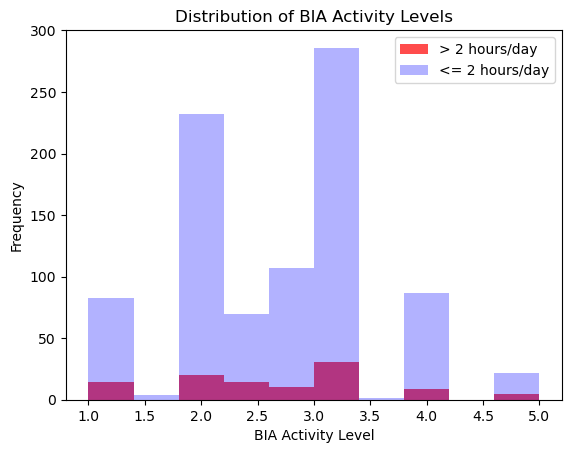

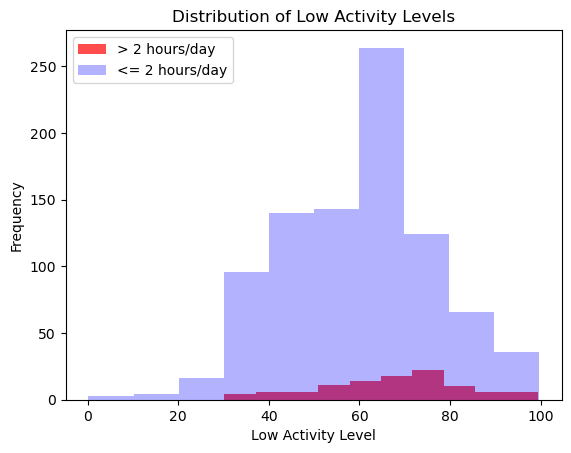

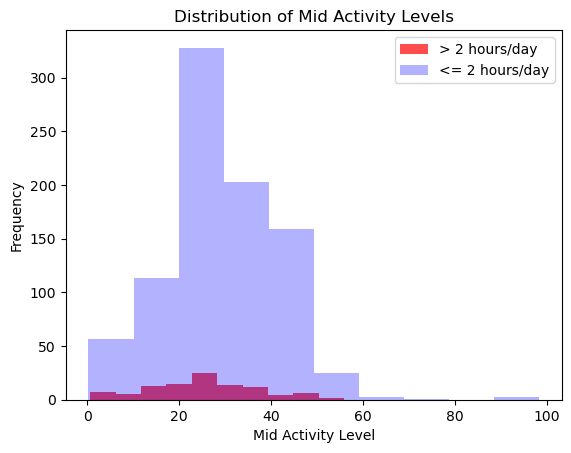

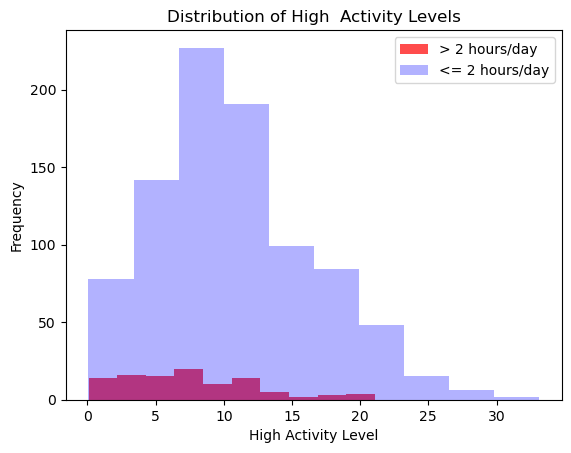

In [30]:
more_than_two = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['BIA-BIA_Activity_Level_num']
less_than_two = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['BIA-BIA_Activity_Level_num']
plt.hist(more_than_two, bins=10, alpha=0.7, label='> 2 hours/day', color= 'red', rwidth=1)
plt.hist(less_than_two, bins=10, alpha=0.3, label='<= 2 hours/day', color = 'blue',  rwidth=1)
plt.xlabel('BIA Activity Level')
plt.ylabel('Frequency')
plt.title('Distribution of BIA Activity Levels')
plt.legend()
plt.show()

more_enmo1 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['enmo1']
less_enmo1 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['enmo1']
plt.hist(more_enmo1, bins=10, alpha=0.7, label='> 2 hours/day', color= 'red', rwidth=1)
plt.hist(less_enmo1, bins=10, alpha=0.3, label='<= 2 hours/day', color = 'blue',  rwidth=1)
plt.xlabel('Low Activity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Low Activity Levels')
plt.legend()
plt.show()


more_enmo2 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['enmo2']
less_enmo2 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['enmo2']
plt.hist(more_enmo2, bins=10, alpha=0.7, label='> 2 hours/day', color= 'red')
plt.hist(less_enmo2, bins=10, alpha=0.3, label='<= 2 hours/day', color = 'blue')
plt.xlabel('Mid Activity Level')
plt.ylabel('Frequency')
plt.title('Distribution of Mid Activity Levels')
plt.legend()
plt.show()

more_enmo3 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['enmo3']
less_enmo3 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['enmo3']
plt.hist(more_enmo3, bins=10, alpha=0.7, label='> 2 hours/day', color= 'red', rwidth=1)
plt.hist(less_enmo3, bins=10, alpha=0.3, label='<= 2 hours/day', color = 'blue',  rwidth=1)
plt.xlabel('High Activity Level')
plt.ylabel('Frequency')
plt.title('Distribution of High  Activity Levels')
plt.legend()
plt.show()

به وضوح در تمام نمودارها مشاهده می‌شود که میزان فعالیت کودکان و نوجوانانی که بیشتر از دو ساعت از اینترنت استفاده می‌کنند با کسانی که کمتر استفاده می‌کنند برابر نیست.

In [31]:
#Enmo1 is for low-activity exercises

more_enmo1 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['enmo1']
less_enmo1 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['enmo1']

stat_enmo1m, p_enmo1m = shapiro(more_enmo1)
stat_enmo1l, p_enmo1l = shapiro(less_enmo1)
print('for low-activities data we have:')
if p_enmo1m >= 0.05:
    print("The data for 'more_than_two' is normally distributed.")
else:
    print("The data for 'more_than_two' is not normally distributed.")

if p_enmo1l >= 0.05:
    print("The data for 'less_than_two' is normally distributed.")
else:
    print("The data for 'less_than_two' is not normally distributed.")
se1, pe1= ttest_ind(more_enmo1, less_enmo1)
print(f"T-test result: stat={se1}, p={pe1}")
if pe1 < 0.05:
    print('T-test:H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.')
else:
    print('T-test: H0 is correct. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.')

sme1, pme1= mannwhitneyu(more_enmo1, less_enmo1)

if pme1 < 0.05:
    print('Mann-Whitney U Test: H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.')
else:
    print('Mann-Whitney U Test: H0 is correct. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.')


print('=====================================')

#Enmo2 is for mid-level activities


more_enmo2 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['enmo2']
less_enmo2 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['enmo2']

stat_enmo2m, p_enmo2m = shapiro(more_enmo2)
stat_enmo2l, p_enmo2l = shapiro(less_enmo2)
print('for mid-level activities data we have:')
if p_enmo2m >= 0.05:
    print("The data for 'more_than_two' is normally distributed.")
else:
    print("The data for 'more_than_two' is not normally distributed.")

if p_enmo2l >= 0.05:
    print("The data for 'less_than_two' is normally distributed.")
else:
    print("The data for 'less_than_two' is not normally distributed.")

se2, pe2= ttest_ind(more_enmo2, less_enmo2)
print(f"T-test result: stat={se2}, p={pe2}")
if pe2 < 0.05:
    print("T-test: H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.")
else:
    print("T-test: H0 is correct. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours..")
   

sme2, pme2= mannwhitneyu(more_enmo2, less_enmo2)

if pme2 < 0.05:
    print("Mann-Whitney U Test: H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.")
else:
    print("Mann-Whitney U Test: H0 is correct. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.")

print('========================================')


# Enmo3 is for high-level activities 


more_enmo3 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] > 2]['enmo3']
less_enmo3 = df_h3[df_h3['PreInt_EduHx-computerinternet_hoursday'] <= 2]['enmo3']

stat_enmo3m, p_enmo3m = shapiro(more_enmo3)
stat_enmo3l, p_enmo3l = shapiro(less_enmo3)
print('for high-level activities data we have:')
if p_enmo3m >= 0.05:
    print("The data for 'more_than_two' is normally distributed.")
else:
    print("The data for 'more_than_two' is not normally distributed.")

if p_enmo3l >= 0.05:
    print("The data for 'less_than_two' is normally distributed.")
else:
    print("The data for 'less_than_two' is not normally distributed.")

sme3, pme3= mannwhitneyu(more_enmo3, less_enmo3)

if pme3 < 0.05:
    print("Mann-Whitney U Test: H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.")
else:
    print("Mann-Whitney U Test: H0 is correct. The level of physical activity in children and adults who use the internet for more than two hours is equal to those who use it for less than two hours.")



for low-activities data we have:
The data for 'more_than_two' is normally distributed.
The data for 'less_than_two' is not normally distributed.
T-test result: stat=4.221946546681066, p=2.644203790914961e-05
T-test:H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.
Mann-Whitney U Test: H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.
for mid-level activities data we have:
The data for 'more_than_two' is normally distributed.
The data for 'less_than_two' is not normally distributed.
T-test result: stat=-3.1845329416189094, p=0.0014950224830731103
T-test: H0 is rejected. The level of physical activity in children and adults who use the internet for more than two hours is not equal to those who use it for less than two hours.
Mann-Whitney U Test: 